In [88]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [89]:
df = pd.read_csv("Country-data.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [90]:
df_data = df.drop(["country"], axis=1)
df_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


(167, 9)


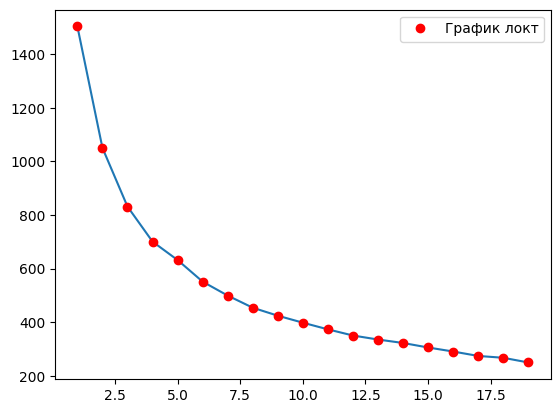

In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_data)

print(X_scaled.shape)

k_inertia = []
ks = range(1, 20)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k, n_init=10)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia, 'ro', label="График локт")
plt.legend()
plt.show()

In [92]:
kmeans = KMeans(n_clusters=5, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
pd.DataFrame(clusters).value_counts()

4    87
1    44
0    32
3     3
2     1
Name: count, dtype: int64

,0,1,2,3,4,5,6,7,8,p
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,4
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,4
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,4
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,4
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,4
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,4
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,1


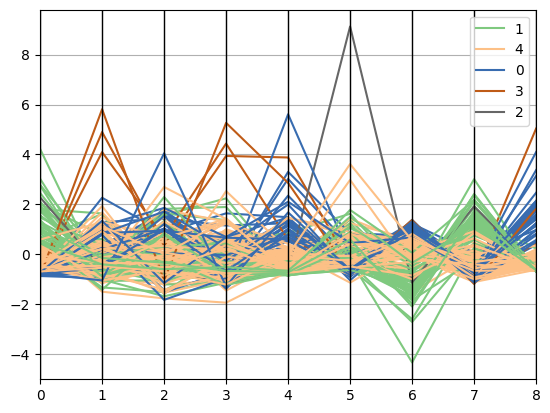

In [93]:
from pandas.plotting import parallel_coordinates

x_dat = pd.DataFrame(X_scaled)
x_dat['p'] = clusters

display(x_dat)

parallel_coordinates(x_dat, 'p', colormap="Accent")
plt.show()

In [94]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [95]:

print(X_scaled.shape)
X_scaled = X_scaled.reshape((501, 3))
X_scaled



(167, 9)


array([[ 1.29153238, -1.13827979,  0.27908825],
       [-0.08245496, -0.8082454 ,  0.15733622],
       [-1.61909203,  1.90288227, -0.67917961],
       ...,
       [ 1.11495062, -0.15034774, -0.33801514],
       [-0.66247742, -0.72135793,  0.59001454],
       [-2.09278484,  1.6246091 , -0.62954556]])

In [96]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0,
       1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0,
       2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2,
       1, 2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 0,
       0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1,
       2, 2, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1,
       0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0,
       2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1,
       2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 0,
       1, 0, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 0,
       0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 1,
       2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1,

(501, 3)


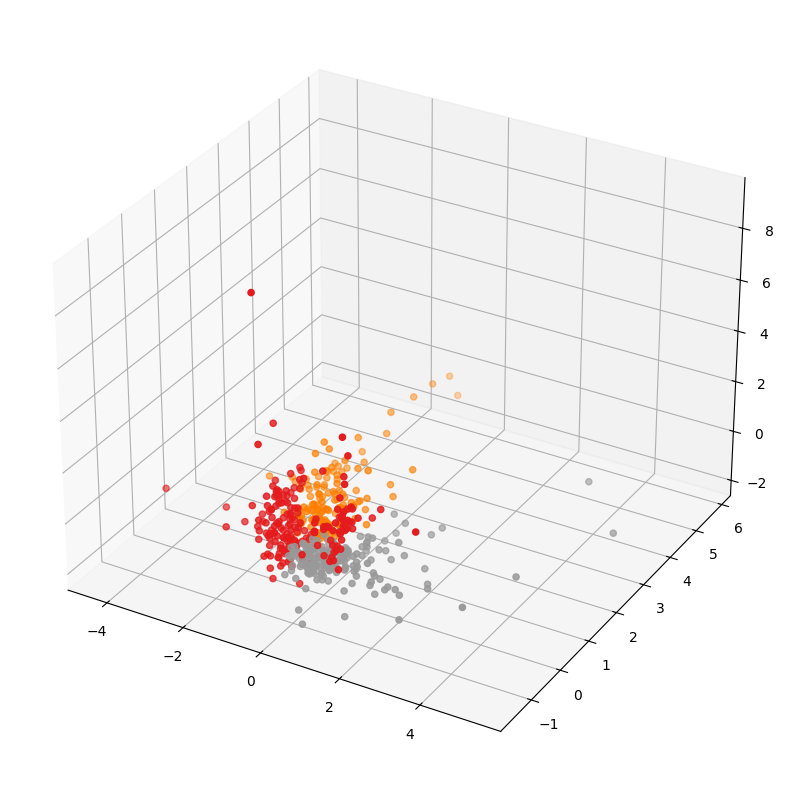

In [97]:
print(X_scaled.shape)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], cmap='Set1', c=clusters)
plt.show()

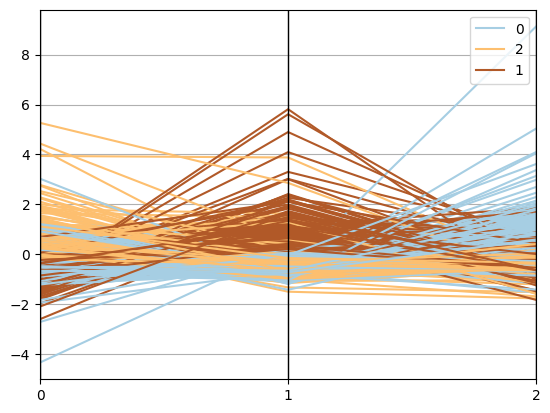

In [98]:
x_dat = pd.DataFrame(X_scaled)
x_dat['p'] = clusters

parallel_coordinates(x_dat, 'p', colormap='Paired')
plt.show()

end

p.s.


In [99]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

In [100]:
X_scaled = (X_scaled[0:500]).reshape(750,2)
X_scaled.shape

(750, 2)

[1.46280867 2.46732397 4.20956068 ... 1.54057986 1.97994076 1.30984266]


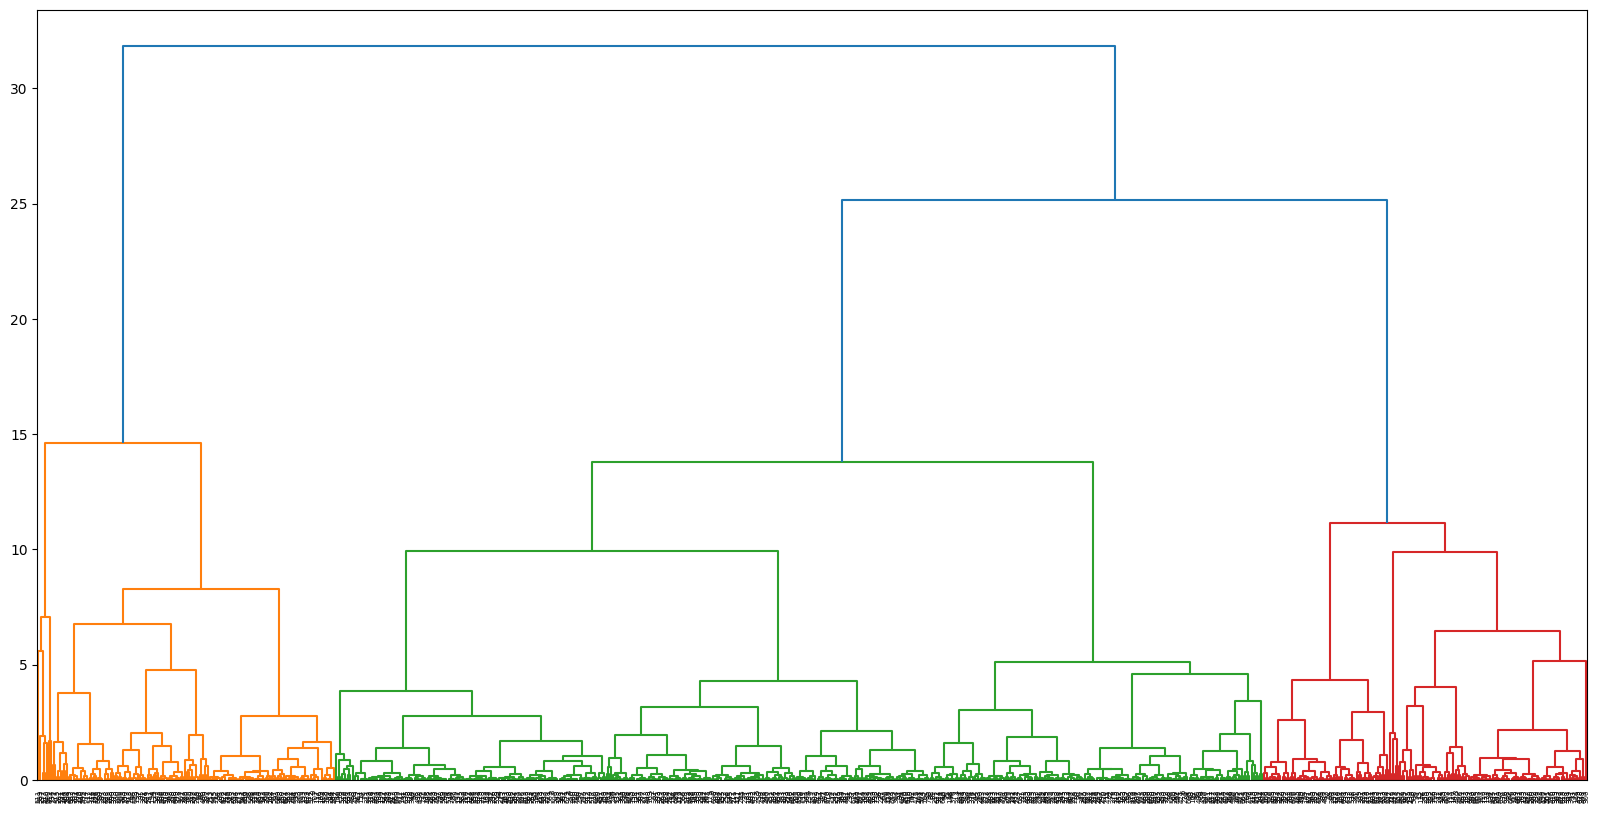

In [101]:
# строим дендрограмму
distance_mat = pdist(X_scaled)  # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
print(distance_mat)
Z = hierarchy.linkage(distance_mat, method='ward', optimal_ordering=True)
plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(Z)

In [105]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(X_scaled)
clusters.shape # 0, 1, 1, 1, 2, 0, 1, 2 - example

(750,)

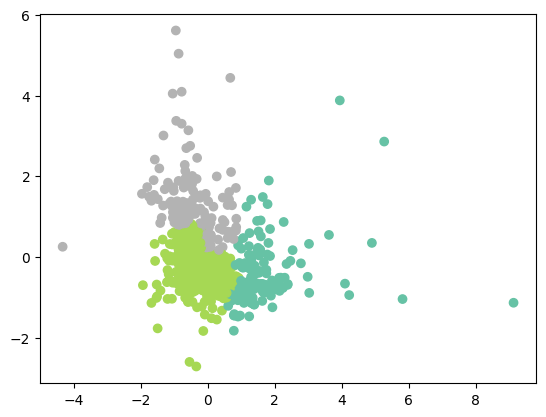

In [106]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap="Set2")
plt.show()